<a href="https://colab.research.google.com/github/amitdeo28/Pytorch-/blob/main/simple_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [28]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer(4 features of flower) -->
  # Hidden layer1 (number of neurons) --> H2 (n) --> Output layer (# classes of iris flowers)

  def __init__(self, in_features = 4, h1 = 8, h2 = 9, out_features = 3):
    super().__init__() #instiatiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))   #relu --> rectified linear unit function
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [29]:
# Pick a random seed for randomization
torch.manual_seed(41)
# create an instance for Model
model = Model()

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [32]:
my_df.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [33]:
my_df.shape

(150, 5)

In [34]:
# Change last column from string to integers
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [35]:
# Train Test Split --> Set X, y
X = my_df.drop('variety', axis = 1)
y = my_df['variety']

In [36]:
# Convert these to numpy array
X = X.values
y = y.values

In [37]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [40]:
# convert X feature to float Tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [41]:
# Convert y label to Tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [42]:
# Set the criterion of mpdel to measure the error, how far off the presictions are from the data
criterion = nn.CrossEntropyLoss()
# choose Adam Optimizer, lr = learning rate
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [43]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [44]:
# Train our Model
# Epochs? --> (one run thru all the data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train)    #get predicted results

  # Measure rhe loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) #predicted value vs y_train

  # Keep track of our losses
  losses.append(loss.detach().numpy())

  # Print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch {i} and loss {loss}')

  # Do some back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch 0 and loss 1.1225894689559937
Epoch 10 and loss 1.0135607719421387
Epoch 20 and loss 0.8206457495689392
Epoch 30 and loss 0.598098635673523
Epoch 40 and loss 0.4137578308582306
Epoch 50 and loss 0.2832970917224884
Epoch 60 and loss 0.19361941516399384
Epoch 70 and loss 0.1366386115550995
Epoch 80 and loss 0.10245425999164581
Epoch 90 and loss 0.08336663991212845


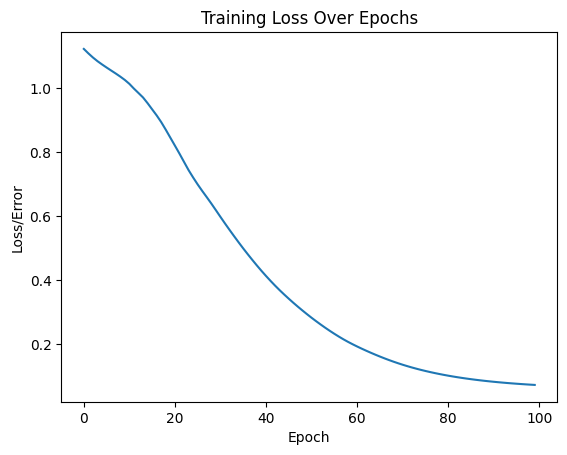

In [45]:
# Graph it out
plt.plot(range(epochs), losses)
plt.ylabel('Loss/Error')
plt.xlabel('Epoch')
plt.title('Training Loss Over Epochs')
plt.show()

In [46]:
# Evaluate the Model on test Data Set (validate model on test set)
with torch.no_grad():  #Basically it turn off thr back propagation
  y_val = model.forward(X_test)
  loss = criterion(y_val, y_test)

In [47]:
loss

tensor(0.0570)

In [48]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = 'Setosa'
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'

    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.) {str(y_val)} \t {x}')

    # correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'we got {correct} correct')

1.) tensor([-4.1463,  5.0282,  2.5055]) 	 Versicolor
2.) tensor([ 5.1142, -2.7576, -3.1783]) 	 Setosa
3.) tensor([ 4.0352, -1.7570, -2.6939]) 	 Setosa
4.) tensor([-4.6162,  5.5497,  2.6854]) 	 Versicolor
5.) tensor([-6.1847,  4.2124,  6.8947]) 	 Virginica
6.) tensor([-7.4786,  5.6410,  7.4071]) 	 Virginica
7.) tensor([ 3.5939, -1.3372, -2.5116]) 	 Setosa
8.) tensor([ 4.2962, -2.0118, -2.7961]) 	 Setosa
9.) tensor([-4.2421,  5.4835,  2.1355]) 	 Versicolor
10.) tensor([ 4.5124, -2.1952, -2.9039]) 	 Setosa
11.) tensor([-4.7493,  5.8288,  2.5745]) 	 Versicolor
12.) tensor([-7.2520,  4.4656,  8.3614]) 	 Virginica
13.) tensor([-2.8918,  4.6705,  0.7947]) 	 Versicolor
14.) tensor([-2.9833,  4.7886,  0.8439]) 	 Versicolor
15.) tensor([-6.5849,  4.7801,  6.8767]) 	 Virginica
16.) tensor([-6.8378,  3.8055,  8.4303]) 	 Virginica
17.) tensor([-4.4287,  4.8880,  3.1420]) 	 Versicolor
18.) tensor([-5.9769,  4.8211,  5.8025]) 	 Virginica
19.) tensor([-3.2091,  4.9927,  0.9574]) 	 Versicolor
20.) tens